In \[98\]:

    import numpy as np
    import pandas as pd

    import matplotlib.pyplot as plt
    import seaborn as sns

In \[99\]:

    sales = pd.read_csv("~/Downloads/k_circle_sales.csv")

### Missing Values<a href="#Missing-Values" class="anchor-link">¶</a>

In \[100\]:

    # Item Weight

    vals = np.round(sales.groupby("Item_Identifier")
                    ["Item_Weight"].mean(),2).to_dict()

In \[101\]:

    sales["Item_Weight"] = sales["Item_Identifier"].map(vals)

In \[102\]:

    sns.scatterplot(x = "Item_Weight", y= "Item_Outlet_Sales",data = sales)

Out\[102\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x154bbb1ddd8>

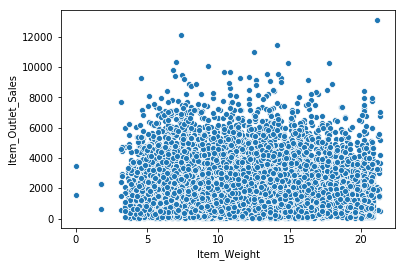

In \[103\]:

    sales.loc[sales.Item_Weight.isnull()]

Out\[103\]:

|      | Item_Identifier | Item_Weight | Item_Fat_Content | Item_Visibility | Item_Type    | Item_MRP | Outlet_Identifier | Outlet_Establishment_Year | Outlet_Size | Outlet_Location_Type | Outlet_Type       | Item_Outlet_Sales | Profit |
|------|-----------------|-------------|------------------|-----------------|--------------|----------|-------------------|---------------------------|-------------|----------------------|-------------------|-------------------|--------|
| 1922 | FDK57           | NaN         | Low Fat          | 0.079904        | Snack Foods  | 120.0    | OUT027            | 1985                      | Medium      | Tier 2               | Supermarket Type3 | 4434.2280         | 14.5   |
| 5022 | FDQ60           | NaN         | Regular          | 0.191501        | Baking Goods | 121.2    | OUT019            | 1985                      | Small       | Tier1                | Grocery Store     | 120.5098          | 12.3   |

In \[104\]:

    sales.loc[sales.Item_Weight==0]

Out\[104\]:

|      | Item_Identifier | Item_Weight | Item_Fat_Content | Item_Visibility | Item_Type    | Item_MRP | Outlet_Identifier | Outlet_Establishment_Year | Outlet_Size | Outlet_Location_Type | Outlet_Type       | Item_Outlet_Sales | Profit |
|------|-----------------|-------------|------------------|-----------------|--------------|----------|-------------------|---------------------------|-------------|----------------------|-------------------|-------------------|--------|
| 927  | FDN52           | 0.0         | Regular          | 0.130933        | Frozen Foods | 86.9     | OUT027            | 1985                      | Medium      | Tier 2               | Supermarket Type3 | 1569.9564         | 14.1   |
| 4187 | FDE52           | 0.0         | Regular          | 0.029742        | Dairy        | 89.0     | OUT027            | 1985                      | Medium      | Tier 2               | Supermarket Type3 | 3453.5046         | 13.9   |

In \[105\]:

    # Missing Case
    np.round(sales.loc[sales.Item_Type=="Dairy", "Item_Weight"].mean(), 2)

Out\[105\]:

    12.33

In \[106\]:

    sales.loc[sales.Item_Identifier=="FDN52", "Item_Weight"] = 11.88

    sales.loc[sales.Item_Identifier=="FDE52", "Item_Weight"] = 12.33

In \[107\]:

    sales.Item_Weight.describe()

Out\[107\]:

    count    8521.000000
    mean       11.740190
    std         4.452709
    min         1.800000
    25%         7.860000
    50%        11.500000
    75%        15.170000
    max        21.350000
    Name: Item_Weight, dtype: float64

### Feature Engineering<a href="#Feature-Engineering" class="anchor-link">¶</a>

-   Data Scaling
-   Transformation
-   Encoding
-   **Feature Extraction**

In \[108\]:

    sales.head()

Out\[108\]:

|     | Item_Identifier | Item_Weight | Item_Fat_Content | Item_Visibility | Item_Type             | Item_MRP | Outlet_Identifier | Outlet_Establishment_Year | Outlet_Size | Outlet_Location_Type | Outlet_Type       | Item_Outlet_Sales | Profit |
|-----|-----------------|-------------|------------------|-----------------|-----------------------|----------|-------------------|---------------------------|-------------|----------------------|-------------------|-------------------|--------|
| 0   | FDA15           | 9.30        | Low Fat          | 0.016047        | Dairy                 | 249.8    | OUT049            | 1999                      | Medium      | Tier 2               | Supermarket Type1 | 3735.1380         | 11.5   |
| 1   | DRC01           | 5.92        | Regular          | 0.019278        | Soft Drinks           | 48.3     | OUT018            | 2009                      | Medium      | Tier 2               | Supermarket Type2 | 443.4228          | 14.3   |
| 2   | FDN15           | 14.58       | Low Fat          | 0.016760        | Meat                  | 141.6    | OUT049            | 1999                      | Medium      | Tier 2               | Supermarket Type1 | 2097.2700         | 14.5   |
| 3   | FDX07           | 19.20       | Regular          | 0.000000        | Fruits and Vegetables | 182.1    | OUT010            | 1998                      | NaN         | NaN                  | Grocery Store     | 732.3800          | 13.6   |
| 4   | NCD19           | 8.93        | Low Fat          | 0.000000        | Household             | 53.9     | OUT013            | 1987                      | High        | Tier 3               | Supermarket Type1 | 994.7052          | 14.1   |

In \[109\]:

    sales.Item_Identifier[0][:2]

Out\[109\]:

    'FD'

In \[110\]:

    items = []
    for i in sales.Item_Identifier:
        items.append(i[:2])

In \[111\]:

    sales["Item_IDs"] = pd.Series(items)

In \[112\]:

    sales.head()

Out\[112\]:

|     | Item_Identifier | Item_Weight | Item_Fat_Content | Item_Visibility | Item_Type             | Item_MRP | Outlet_Identifier | Outlet_Establishment_Year | Outlet_Size | Outlet_Location_Type | Outlet_Type       | Item_Outlet_Sales | Profit | Item_IDs |
|-----|-----------------|-------------|------------------|-----------------|-----------------------|----------|-------------------|---------------------------|-------------|----------------------|-------------------|-------------------|--------|----------|
| 0   | FDA15           | 9.30        | Low Fat          | 0.016047        | Dairy                 | 249.8    | OUT049            | 1999                      | Medium      | Tier 2               | Supermarket Type1 | 3735.1380         | 11.5   | FD       |
| 1   | DRC01           | 5.92        | Regular          | 0.019278        | Soft Drinks           | 48.3     | OUT018            | 2009                      | Medium      | Tier 2               | Supermarket Type2 | 443.4228          | 14.3   | DR       |
| 2   | FDN15           | 14.58       | Low Fat          | 0.016760        | Meat                  | 141.6    | OUT049            | 1999                      | Medium      | Tier 2               | Supermarket Type1 | 2097.2700         | 14.5   | FD       |
| 3   | FDX07           | 19.20       | Regular          | 0.000000        | Fruits and Vegetables | 182.1    | OUT010            | 1998                      | NaN         | NaN                  | Grocery Store     | 732.3800          | 13.6   | FD       |
| 4   | NCD19           | 8.93        | Low Fat          | 0.000000        | Household             | 53.9     | OUT013            | 1987                      | High        | Tier 3               | Supermarket Type1 | 994.7052          | 14.1   | NC       |

In \[113\]:

    sns.boxplot(x = "Item_IDs", y = "Item_Outlet_Sales", data = sales)

Out\[113\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x154bcbc2710>

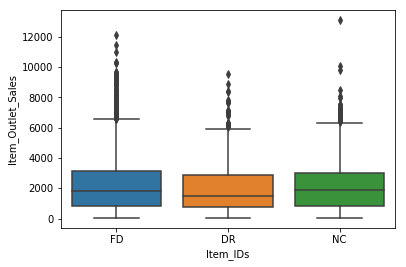

#### Item Type : Perishable & Non Perishable<a href="#Item-Type-:-Perishable-&amp;-Non-Perishable"
class="anchor-link">¶</a>

In \[114\]:

    sales.Item_Type.unique()

Out\[114\]:

    array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
           'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
           'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
           'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In \[115\]:

    perishables = ['Dairy', 'Meat', 'Fruits and Vegetables',
                  'Breakfast', 'Breads', 'Starchy Foods', 'Seafood']

In \[116\]:

    def perish(x):
        if x in perishables:
            return("Perishables")
        else:
            return("Non_Perishables")

In \[117\]:

    sales["Item_Cat"] = sales.Item_Type.apply(perish)

In \[118\]:

    newsales = sales.drop(["Item_Type", "Item_Identifier"], axis = 1)

In \[119\]:

    newsales.head(2)

Out\[119\]:

|     | Item_Weight | Item_Fat_Content | Item_Visibility | Item_MRP | Outlet_Identifier | Outlet_Establishment_Year | Outlet_Size | Outlet_Location_Type | Outlet_Type       | Item_Outlet_Sales | Profit | Item_IDs | Item_Cat        |
|-----|-------------|------------------|-----------------|----------|-------------------|---------------------------|-------------|----------------------|-------------------|-------------------|--------|----------|-----------------|
| 0   | 9.30        | Low Fat          | 0.016047        | 249.8    | OUT049            | 1999                      | Medium      | Tier 2               | Supermarket Type1 | 3735.1380         | 11.5   | FD       | Perishables     |
| 1   | 5.92        | Regular          | 0.019278        | 48.3     | OUT018            | 2009                      | Medium      | Tier 2               | Supermarket Type2 | 443.4228          | 14.3   | DR       | Non_Perishables |

In \[120\]:

    # Fix the Item Fat Content
    newsales.Item_Fat_Content.unique()

Out\[120\]:

    array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In \[121\]:

    newsales.Item_Fat_Content.replace(to_replace = ['low fat', 'LF', 'reg'],
                                     value = ['Low Fat', 'Low Fat', 'Regular'], 
                                      inplace = True)

In \[122\]:

    sns.boxplot(x = "Item_Fat_Content", 
                y = "Item_Outlet_Sales", 
                data = newsales)

Out\[122\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x154bb37cd68>

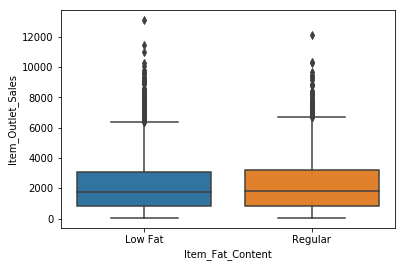

In \[123\]:

    sns.boxplot(x = "Item_Cat", 
                y = "Item_Outlet_Sales", 
                data = newsales)

Out\[123\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x154bb2a5588>

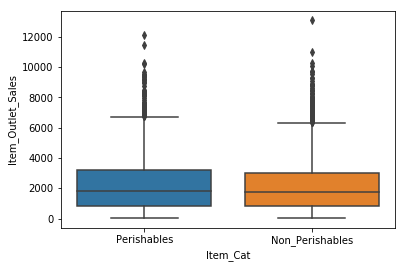

In \[124\]:

    newsales.groupby("Item_IDs")["Item_Fat_Content"].describe()

Out\[124\]:

|          | count | unique | top     | freq |
|----------|-------|--------|---------|------|
| Item_IDs |       |        |         |      |
| DR       | 799   | 2      | Low Fat | 728  |
| FD       | 6125  | 2      | Low Fat | 3190 |
| NC       | 1599  | 1      | Low Fat | 1599 |

In \[125\]:

    # Replacing Item Fat Content as Non Edible where the Item ID == NC
    newsales.loc[newsales.Item_IDs=="NC", 
                 "Item_Fat_Content"] = "Non Edible"

In \[126\]:

    newsales.head(2)

Out\[126\]:

|     | Item_Weight | Item_Fat_Content | Item_Visibility | Item_MRP | Outlet_Identifier | Outlet_Establishment_Year | Outlet_Size | Outlet_Location_Type | Outlet_Type       | Item_Outlet_Sales | Profit | Item_IDs | Item_Cat        |
|-----|-------------|------------------|-----------------|----------|-------------------|---------------------------|-------------|----------------------|-------------------|-------------------|--------|----------|-----------------|
| 0   | 9.30        | Low Fat          | 0.016047        | 249.8    | OUT049            | 1999                      | Medium      | Tier 2               | Supermarket Type1 | 3735.1380         | 11.5   | FD       | Perishables     |
| 1   | 5.92        | Regular          | 0.019278        | 48.3     | OUT018            | 2009                      | Medium      | Tier 2               | Supermarket Type2 | 443.4228          | 14.3   | DR       | Non_Perishables |

In \[127\]:

    sns.boxplot(newsales.Outlet_Identifier, newsales.Item_Outlet_Sales)
    plt.xticks(rotation = 90)
    plt.show()

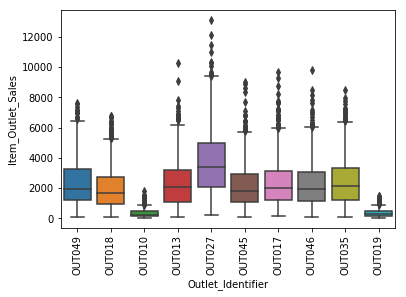

In \[128\]:

    newsales.Outlet_Identifier.unique()

Out\[128\]:

    array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
           'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In \[129\]:

    high = ['OUT013', 'OUT027']
    low = ['OUT010', 'OUT019']

In \[130\]:

    def out(x):
        if x in high:
            return("High")
        elif x in low:
            return("Low")
        else:
            return("Average")

In \[131\]:

    newsales["Outlets"] = newsales.Outlet_Identifier.apply(out)

In \[132\]:

    sns.boxplot(x = "Outlets", 
                y = "Item_Outlet_Sales", 
                data = newsales)

Out\[132\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x154bcc72390>

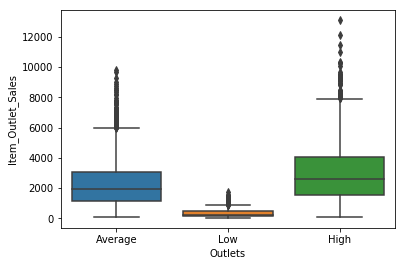

In \[133\]:

    #newsales.loc[:, ["Outlet_Establishment_Year", "Item_Outlet_Sales"]]

    sns.boxplot(newsales.Outlet_Establishment_Year, 
               newsales.Item_Outlet_Sales)

Out\[133\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x154bcd23e48>

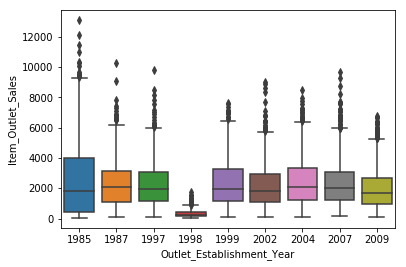

In \[136\]:

    # Mean Encoding

    year_sales = newsales.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].mean().to_dict()

In \[137\]:

    year_sales

Out\[137\]:

    {1985: 2483.6774743677356,
     1987: 2298.9952555793975,
     1997: 2277.8442668817192,
     1998: 339.3516619819822,
     1999: 2348.354634623656,
     2002: 2192.3847976318607,
     2004: 2438.8418660215075,
     2007: 2340.67526349892,
     2009: 1995.4987392241392}

In \[138\]:

    newsales["Outlet_Establishment_Year"] = newsales.Outlet_Establishment_Year.map(year_sales)

In \[139\]:

    newsales.head()

Out\[139\]:

|     | Item_Weight | Item_Fat_Content | Item_Visibility | Item_MRP | Outlet_Identifier | Outlet_Establishment_Year | Outlet_Size | Outlet_Location_Type | Outlet_Type       | Item_Outlet_Sales | Profit | Item_IDs | Item_Cat        | Outlets |
|-----|-------------|------------------|-----------------|----------|-------------------|---------------------------|-------------|----------------------|-------------------|-------------------|--------|----------|-----------------|---------|
| 0   | 9.30        | Low Fat          | 0.016047        | 249.8    | OUT049            | 2348.354635               | Medium      | Tier 2               | Supermarket Type1 | 3735.1380         | 11.5   | FD       | Perishables     | Average |
| 1   | 5.92        | Regular          | 0.019278        | 48.3     | OUT018            | 1995.498739               | Medium      | Tier 2               | Supermarket Type2 | 443.4228          | 14.3   | DR       | Non_Perishables | Average |
| 2   | 14.58       | Low Fat          | 0.016760        | 141.6    | OUT049            | 2348.354635               | Medium      | Tier 2               | Supermarket Type1 | 2097.2700         | 14.5   | FD       | Perishables     | Average |
| 3   | 19.20       | Regular          | 0.000000        | 182.1    | OUT010            | 339.351662                | NaN         | NaN                  | Grocery Store     | 732.3800          | 13.6   | FD       | Perishables     | Low     |
| 4   | 8.93        | Non Edible       | 0.000000        | 53.9     | OUT013            | 2298.995256               | High        | Tier 3               | Supermarket Type1 | 994.7052          | 14.1   | NC       | Non_Perishables | High    |

In \[140\]:

    newsales.corr()

Out\[140\]:

|                           | Item_Weight | Item_Visibility | Item_MRP  | Outlet_Establishment_Year | Item_Outlet_Sales | Profit    |
|---------------------------|-------------|-----------------|-----------|---------------------------|-------------------|-----------|
| Item_Weight               | 1.000000    | -0.012373       | 0.020986  | -0.017027                 | 0.008063          | -0.013736 |
| Item_Visibility           | -0.012373   | 1.000000        | -0.001597 | -0.155251                 | -0.128625         | 0.014269  |
| Item_MRP                  | 0.020986    | -0.001597       | 1.000000  | -0.000182                 | 0.567555          | 0.004109  |
| Outlet_Establishment_Year | -0.017027   | -0.155251       | -0.000182 | 1.000000                  | 0.296493          | 0.018865  |
| Item_Outlet_Sales         | 0.008063    | -0.128625       | 0.567555  | 0.296493                  | 1.000000          | 0.000951  |
| Profit                    | -0.013736   | 0.014269        | 0.004109  | 0.018865                  | 0.000951          | 1.000000  |

In \[141\]:

    sns.scatterplot(newsales.Outlet_Establishment_Year,
                   newsales.Item_Outlet_Sales, color = "hotpink")

Out\[141\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x154bcddf898>

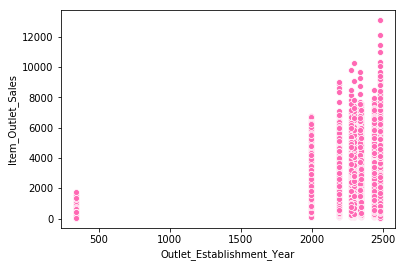

In \[142\]:

    newsales.Outlet_Location_Type.unique()

Out\[142\]:

    array(['Tier 2', nan, 'Tier 3', '  --', 'Tier1', 'na', '  -', '?', 'NAN'],
          dtype=object)

In \[143\]:

    noise = ["nan", '  --', 'na', '  -', '?', 'NAN']

In \[144\]:

    def noisydata(x):
        if x in noise:
            return(np.NaN)

In \[145\]:

    newsales.Outlet_Location_Type.replace(to_replace=noise, 
                                          value = ["Missing"]*6, inplace = True)

In \[146\]:

    newsales.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].describe()

Out\[146\]:

|                      | count  | mean        | std         | min     | 25%        | 50%       | 75%        | max        |
|----------------------|--------|-------------|-------------|---------|------------|-----------|------------|------------|
| Outlet_Location_Type |        |             |             |         |            |           |            |            |
| Missing              | 360.0  | 1816.694482 | 1590.728185 | 39.9480 | 518.99110  | 1362.8926 | 2693.99325 | 9275.9256  |
| Tier 2               | 2793.0 | 2681.603542 | 1855.210528 | 69.2432 | 1270.34640 | 2251.0698 | 3691.19520 | 13086.9648 |
| Tier 3               | 932.0  | 2298.995256 | 1533.531664 | 73.2380 | 1072.60380 | 2050.6640 | 3166.37835 | 10256.6490 |
| Tier1                | 2388.0 | 1912.149161 | 1582.370364 | 33.9558 | 601.05095  | 1544.6560 | 2824.32360 | 9779.9362  |

In \[147\]:

    sns.boxplot(newsales.Outlet_Location_Type, newsales.Item_Outlet_Sales)

Out\[147\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x154bce96e10>

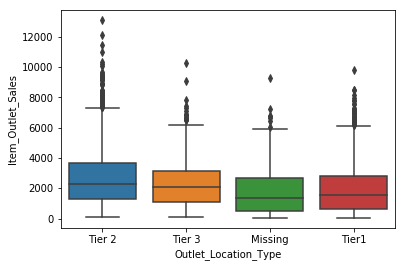

In \[148\]:

    newsales.isnull().sum()

Out\[148\]:

    Item_Weight                     2
    Item_Fat_Content                0
    Item_Visibility                 0
    Item_MRP                        0
    Outlet_Identifier               0
    Outlet_Establishment_Year       0
    Outlet_Size                  2410
    Outlet_Location_Type         2050
    Outlet_Type                     0
    Item_Outlet_Sales               0
    Profit                          0
    Item_IDs                        0
    Item_Cat                        0
    Outlets                         0
    dtype: int64

In \[149\]:

    newsales.loc[newsales.Outlet_Location_Type.isnull(), 
                 "Outlet_Type"].unique()

Out\[149\]:

    array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In \[150\]:

    pd.DataFrame(newsales.groupby("Outlet_Location_Type")["Outlet_Type"].
                 value_counts()).T

Out\[150\]:

| Outlet_Location_Type | Missing           |               | Tier 2            |                   |                   | Tier 3            | Tier1             |               |
|----------------------|-------------------|---------------|-------------------|-------------------|-------------------|-------------------|-------------------|---------------|
| Outlet_Type          | Supermarket Type1 | Grocery Store | Supermarket Type3 | Supermarket Type1 | Supermarket Type2 | Supermarket Type1 | Supermarket Type1 | Grocery Store |
| Outlet_Type          | 276               | 84            | 935               | 930               | 928               | 932               | 1860              | 528           |

In \[151\]:

    newsales.Outlet_Location_Type.fillna("Tier1", inplace = True)

#### Normal Distt<a href="#Normal-Distt" class="anchor-link">¶</a>

-   There is a difference between ND & Standard Normal Distt.
-   A ND Can be converted into Standard Normal on the basis of Z Score
-   Z Score = (xi-mean)/sd
-   Empirical Rule: 68% data lies within 1SD, 95% Data lies within 02 SD
    & 99.7% data lies within 3 SD.

### Scaling (Standardization)<a href="#Scaling-(Standardization)" class="anchor-link">¶</a>

-   Use Z score transformation to bring the data on same scale : Mean =
    0 & SD = 1

-   **Note: Scaling is never applied on Categorical variables**

In \[152\]:

    num_data = newsales.select_dtypes(include = np.number)
    cols = newsales.select_dtypes(include = np.number).columns

In \[153\]:

    # Apply Zscore Transformation
    import scipy.stats as stats

    zscore_data = pd.DataFrame(stats.zscore(num_data.dropna()), 
                               columns = cols)

In \[154\]:

    zscore_data.describe()

Out\[154\]:

|       | Item_Weight   | Item_Visibility | Item_MRP      | Outlet_Establishment_Year | Item_Outlet_Sales | Profit        |
|-------|---------------|-----------------|---------------|---------------------------|-------------------|---------------|
| count | 8.521000e+03  | 8.521000e+03    | 8.521000e+03  | 8.521000e+03              | 8.521000e+03      | 8.521000e+03  |
| mean  | -3.555033e-17 | -4.628383e-16   | 2.968325e-16  | 2.718001e-16              | 5.748508e-17      | -7.827196e-16 |
| std   | 1.000059e+00  | 1.000059e+00    | 1.000059e+00  | 1.000059e+00              | 1.000059e+00      | 1.000059e+00  |
| min   | -2.232523e+00 | -1.281740e+00   | -1.761997e+00 | -3.640237e+00             | -1.258866e+00     | -7.823527e+00 |
| 25%   | -8.714735e-01 | -7.585739e-01   | -7.581576e-01 | 2.207002e-02              | -7.890580e-01     | -1.260489e-01 |
| 50%   | -5.394563e-02 | -2.363409e-01   | 2.724618e-02  | 2.327734e-01              | -2.267714e-01     | 2.852667e-01  |
| 75%   | 7.703201e-01  | 5.515696e-01    | 7.178876e-01  | 5.091641e-01              | 5.392025e-01      | 5.203042e-01  |
| max   | 2.158321e+00  | 5.084553e+00    | 2.022075e+00  | 5.977766e-01              | 6.391509e+00      | 6.219963e+00  |

In \[155\]:

    zscore_data.head()

Out\[155\]:

|     | Item_Weight | Item_Visibility | Item_MRP  | Outlet_Establishment_Year | Item_Outlet_Sales | Profit    |
|-----|-------------|-----------------|-----------|---------------------------|-------------------|-----------|
| 0   | -0.548056   | -0.970642       | 1.747425  | 0.330327                  | 0.910678          | -1.124958 |
| 1   | -1.307189   | -0.908007       | -1.488953 | -0.367053                 | -1.018499         | 0.520304  |
| 2   | 0.637809    | -0.956824       | 0.009579  | 0.330327                  | -0.049228         | 0.637823  |
| 3   | 1.675440    | -1.281740       | 0.660066  | -3.640237                 | -0.849150         | 0.108989  |
| 4   | -0.631156   | -1.281740       | -1.399009 | 0.232773                  | -0.695409         | 0.402785  |

In \[156\]:

    # drop_first =  true: 
    pd.get_dummies(newsales.drop("Outlet_Identifier", 
                                 axis = 1), drop_first = True).columns

Out\[156\]:

    Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
           'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Profit',
           'Item_Fat_Content_Non Edible', 'Item_Fat_Content_Regular',
           'Outlet_Size_Medium', 'Outlet_Size_Small',
           'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
           'Outlet_Location_Type_Tier1', 'Outlet_Type_Supermarket Type1',
           'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
           'Item_IDs_FD', 'Item_IDs_NC', 'Item_Cat_Perishables', 'Outlets_High',
           'Outlets_Low'],
          dtype='object')

In \[157\]:

    newsales.head()

Out\[157\]:

|     | Item_Weight | Item_Fat_Content | Item_Visibility | Item_MRP | Outlet_Identifier | Outlet_Establishment_Year | Outlet_Size | Outlet_Location_Type | Outlet_Type       | Item_Outlet_Sales | Profit | Item_IDs | Item_Cat        | Outlets |
|-----|-------------|------------------|-----------------|----------|-------------------|---------------------------|-------------|----------------------|-------------------|-------------------|--------|----------|-----------------|---------|
| 0   | 9.30        | Low Fat          | 0.016047        | 249.8    | OUT049            | 2348.354635               | Medium      | Tier 2               | Supermarket Type1 | 3735.1380         | 11.5   | FD       | Perishables     | Average |
| 1   | 5.92        | Regular          | 0.019278        | 48.3     | OUT018            | 1995.498739               | Medium      | Tier 2               | Supermarket Type2 | 443.4228          | 14.3   | DR       | Non_Perishables | Average |
| 2   | 14.58       | Low Fat          | 0.016760        | 141.6    | OUT049            | 2348.354635               | Medium      | Tier 2               | Supermarket Type1 | 2097.2700         | 14.5   | FD       | Perishables     | Average |
| 3   | 19.20       | Regular          | 0.000000        | 182.1    | OUT010            | 339.351662                | NaN         | Tier1                | Grocery Store     | 732.3800          | 13.6   | FD       | Perishables     | Low     |
| 4   | 8.93        | Non Edible       | 0.000000        | 53.9     | OUT013            | 2298.995256               | High        | Tier 3               | Supermarket Type1 | 994.7052          | 14.1   | NC       | Non_Perishables | High    |

-   n-1 encoding(pd.get_dummies), Label Encoding (Ordinal Vars)
-   Missing Values - Basis Pattern
-   Standardization - Scaling - Z Score Transformation

### Agenda for today<a href="#Agenda-for-today" class="anchor-link">¶</a>

-   Outlier Discussion
-   Transformation Techniques - Log Transformation, Boxcox, YeoJensen.
-   Normalization
-   Sklearn Library - Machine Learning Library...preprocessing library
    \| StandardScaler (Zscore), Min Max Scaler, Label Encoder, One Hot
    Encoder...

In \[158\]:

    tips = sns.load_dataset("tips")

In \[159\]:

    tips.head()

Out\[159\]:

|     | total_bill | tip  | sex    | smoker | day | time   | size |
|-----|------------|------|--------|--------|-----|--------|------|
| 0   | 16.99      | 1.01 | Female | No     | Sun | Dinner | 2    |
| 1   | 10.34      | 1.66 | Male   | No     | Sun | Dinner | 3    |
| 2   | 21.01      | 3.50 | Male   | No     | Sun | Dinner | 3    |
| 3   | 23.68      | 3.31 | Male   | No     | Sun | Dinner | 2    |
| 4   | 24.59      | 3.61 | Female | No     | Sun | Dinner | 4    |

In \[160\]:

    # Scaling the Data and Encoding the Cat Variables...
    from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

    # obj that will store the func of StandardScaler
    sc = StandardScaler() # Created a Machine Instance
    rs = RobustScaler()
    mmax = MinMaxScaler()

In \[161\]:

    # Scale the Data
    #sc.fit_transform(tips)

    nums = tips.select_dtypes(include = np.number)

In \[162\]:

    scaled = pd.DataFrame(rs.fit_transform(nums), 
                 columns = ["bill", "tip_scaled", "size_scaled"])

In \[163\]:

    scaled.head(2)

Out\[163\]:

|     | bill      | tip_scaled | size_scaled |
|-----|-----------|------------|-------------|
| 0   | -0.074675 | -1.2096    | 0.0         |
| 1   | -0.691558 | -0.7936    | 1.0         |

In \[164\]:

    tips.head(2)

Out\[164\]:

|     | total_bill | tip  | sex    | smoker | day | time   | size |
|-----|------------|------|--------|--------|-----|--------|------|
| 0   | 16.99      | 1.01 | Female | No     | Sun | Dinner | 2    |
| 1   | 10.34      | 1.66 | Male   | No     | Sun | Dinner | 3    |

In \[165\]:

    new = pd.concat([tips, scaled], axis = 1)

In \[166\]:

    finaldata = new.drop(["total_bill","tip", "size"], axis = 1)

In \[167\]:

    # Encode the Cat Variables
    # We can Apply One Hot Encoding with n-1
    pd.get_dummies(finaldata, drop_first=True).head()

Out\[167\]:

|     | bill      | tip_scaled | size_scaled | sex_Female | smoker_No | day_Fri | day_Sat | day_Sun | time_Dinner |
|-----|-----------|------------|-------------|------------|-----------|---------|---------|---------|-------------|
| 0   | -0.074675 | -1.2096    | 0.0         | 1          | 1         | 0       | 0       | 1       | 1           |
| 1   | -0.691558 | -0.7936    | 1.0         | 0          | 1         | 0       | 0       | 1       | 1           |
| 2   | 0.298237  | 0.3840     | 1.0         | 0          | 1         | 0       | 0       | 1       | 1           |
| 3   | 0.545918  | 0.2624     | 0.0         | 0          | 1         | 0       | 0       | 1       | 1           |
| 4   | 0.630334  | 0.4544     | 2.0         | 1          | 1         | 0       | 0       | 1       | 1           |

### Outliers Analysis<a href="#Outliers-Analysis" class="anchor-link">¶</a>

Outliers are defined as :-

-   Boxplot =\> number\> (Q3+1.5*IQR) \| number\<(Q1-1.5*IQR)
-   Z Score =\> number \>3 sigma \| number \< -3 sigma

These will be considered as an Outlier

In \[198\]:

    # Zscore Condition for DataFrame

    #newsales.loc[~((newsales<-3) | (newsales>3)).any(axis = 1)]
    newsales.shape

Out\[198\]:

    (6111, 14)

In \[191\]:

    # Outlier in the Sales Data
    q1 = newsales.quantile(0.25)
    q3 = newsales.quantile(0.75)
    iqr = q3 - q1

In \[196\]:

    q1

Out\[196\]:

    Item_Weight                     7.850000
    Item_Visibility                 0.026679
    Item_MRP                       94.000000
    Outlet_Establishment_Year    2277.844267
    Item_Outlet_Sales             975.064100
    Profit                         13.200000
    Name: 0.25, dtype: float64

In \[192\]:

    # Defining the Upper and Lower Limit
    upper_lim = q3 + 1.5*iqr

    lower_lim = q1 - 1.5*iqr

In \[193\]:

    plt.rcParams['figure.figsize'] = [15,6]
    newsales.boxplot()
    plt.show()

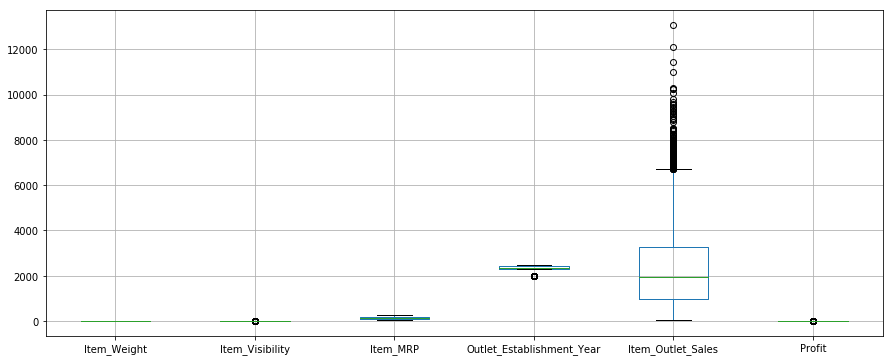

In \[194\]:

    newsales = newsales.dropna()

In \[197\]:

    # Apply the Conditions on the Data
    #number> (Q3+1.5*IQR) | number<(Q1-1.5*IQR)
    # this returns the outlier data

    # ~tilde operator will negate the condition
    # conditions are applied in the brackets
    # .any(axis = 1): return the output where the condition is Met.

    wt_outliers = newsales.loc[~((newsales>upper_lim) | 
                   (newsales<lower_lim)).any(axis=1)]

    ---------------------------------------------------------------------------
    TypeError                                 Traceback (most recent call last)
    ~\Anaconda3\lib\site-packages\pandas\core\internals.py in eval(self, func, other, errors, try_cast, mgr)
       1414             with np.errstate(all='ignore'):
    -> 1415                 result = get_result(other)
       1416 

    ~\Anaconda3\lib\site-packages\pandas\core\internals.py in get_result(other)
       1382             else:
    -> 1383                 result = func(values, other)
       1384 

    TypeError: '>' not supported between instances of 'str' and 'float'

    During handling of the above exception, another exception occurred:

    TypeError                                 Traceback (most recent call last)
    <ipython-input-197-a506406c078b> in <module>()
          6 # conditions are applied in the brackets
          7 # .any(axis = 1): return the output where the condition is Met.
    ----> 8 wt_outliers = newsales.loc[~((newsales>upper_lim) | 
          9                (newsales<lower_lim)).any(axis=1)]

    ~\Anaconda3\lib\site-packages\pandas\core\ops.py in f(self, other)
       1618             return _combine_series_frame(self, other, func,
       1619                                          fill_value=None, axis=None,
    -> 1620                                          level=None, try_cast=False)
       1621         else:
       1622 

    ~\Anaconda3\lib\site-packages\pandas\core\ops.py in _combine_series_frame(self, other, func, fill_value, axis, level, try_cast)
       1437         # default axis is columns
       1438         return self._combine_match_columns(other, func, level=level,
    -> 1439                                            try_cast=try_cast)
       1440 
       1441 

    ~\Anaconda3\lib\site-packages\pandas\core\frame.py in _combine_match_columns(self, other, func, level, try_cast)
       4771         new_data = left._data.eval(func=func, other=right,
       4772                                    axes=[left.columns, self.index],
    -> 4773                                    try_cast=try_cast)
       4774         return self._constructor(new_data)
       4775 

    ~\Anaconda3\lib\site-packages\pandas\core\internals.py in eval(self, **kwargs)
       3685 
       3686     def eval(self, **kwargs):
    -> 3687         return self.apply('eval', **kwargs)
       3688 
       3689     def quantile(self, **kwargs):

    ~\Anaconda3\lib\site-packages\pandas\core\internals.py in apply(self, f, axes, filter, do_integrity_check, consolidate, **kwargs)
       3579 
       3580             kwargs['mgr'] = self
    -> 3581             applied = getattr(b, f)(**kwargs)
       3582             result_blocks = _extend_blocks(applied, result_blocks)
       3583 

    ~\Anaconda3\lib\site-packages\pandas\core\internals.py in eval(self, func, other, errors, try_cast, mgr)
       1420             raise
       1421         except Exception as detail:
    -> 1422             result = handle_error()
       1423 
       1424         # technically a broadcast error in numpy can 'work' by returning a

    ~\Anaconda3\lib\site-packages\pandas\core\internals.py in handle_error()
       1403                 raise TypeError(
       1404                     'Could not operate {other!r} with block values '
    -> 1405                     '{detail!s}'.format(other=other, detail=detail))  # noqa
       1406             else:
       1407                 # return the values

    TypeError: Could not operate array([nan, nan, nan, nan, nan, nan, nan, nan]) with block values '>' not supported between instances of 'str' and 'float'

#### Transformations<a href="#Transformations" class="anchor-link">¶</a>

-   Log Transformation
-   Box Cox
-   Yeo Jensen
-   Square Root
-   Cube Root
-   Step Wise...

In \[204\]:

    np.log((newsales.Item_Outlet_Sales)).skew()

Out\[204\]:

    -0.9291690831355466

In \[201\]:

    # Original
    sns.distplot(newsales.Item_Outlet_Sales)

    C:\Users\IT\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
      return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval

Out\[201\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x154bd4a77f0>

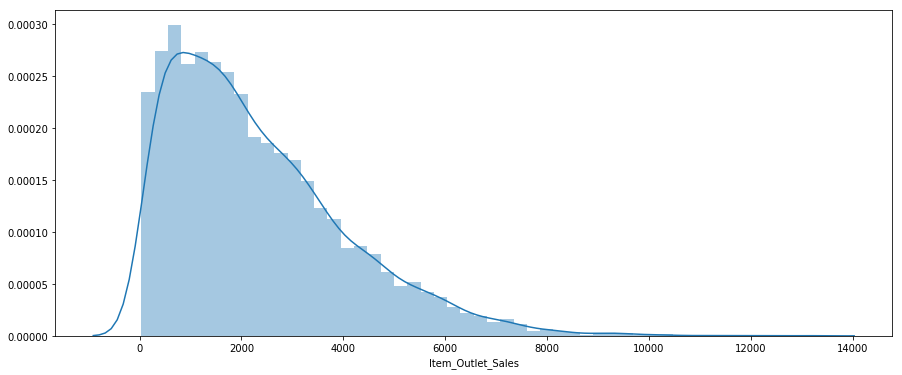

In \[202\]:

    # Log Transform
    sns.distplot(np.log(newsales.Item_Outlet_Sales))

    C:\Users\IT\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
      return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval

Out\[202\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x154beb28da0>

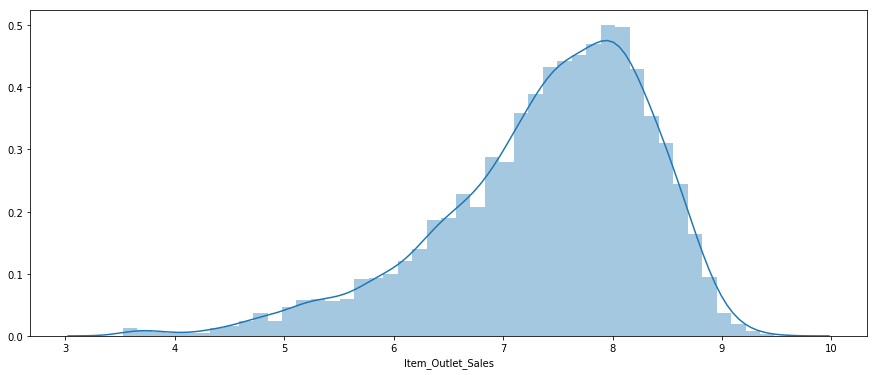

In \[203\]:

    stats.skew(np.log(newsales.Item_Outlet_Sales))

Out\[203\]:

    -0.928940994661324

In \[220\]:

    # Log Cannot Handle 0s and -ve numbers
    # Boxcox transformation to achieve the normality measure... 
    # Boxcox cannot handle 0s
    # 

    import scipy.stats as stats

    stats.skew(stats.yeo(pd.DataFrame({"Vals":[0, 1, 23, 32, 98]}))[0])

    ---------------------------------------------------------------------------
    AttributeError                            Traceback (most recent call last)
    <ipython-input-220-ebde8acd34cb> in <module>()
          6 import scipy.stats as stats
          7 
    ----> 8 stats.skew(stats.yeojohnson(pd.DataFrame({"Vals":[0, 1, 23, 32, 98]}))[0])

    AttributeError: module 'scipy.stats' has no attribute 'yeojohnson'

#### Summary of Transformation<a href="#Summary-of-Transformation" class="anchor-link">¶</a>

Purpose - To Ensure that the Data if skewed (**Not-Normal**), can be
converted into a **Normal** Shape.

-   When we apply the Transformation techniques, we notice that the
    skewness gets reduced. This will work in the favour of Machine
    Learning Models.

-   When we build the model, an assumption that works in the favour is
    that the data should be normally distributed.

-   By Applying transformation, we try to reduce the skewness and
    thereby bringing the data closer to being Normal.

**Process**

-   Try the Log Transformation and Check the Skewness.
-   Apply Boxcox and record the skewness followed by YeoJohnson.
-   Compare the Skewness and whichever transformation achieves the
    lowest skewness, apply that Transformation.